In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance



In [50]:
# Assuming your dataset is in a CSV file
df = pd.read_csv("heart_data.csv")


In [51]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
y_pred = xgb_model.predict(X_test)


In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        33
           1       0.71      0.56      0.63        27

    accuracy                           0.70        60
   macro avg       0.70      0.69      0.69        60
weighted avg       0.70      0.70      0.69        60

Confusion Matrix:
[[27  6]
 [12 15]]


XGBoost Feature Importances:
            Feature  Importance
3               age       103.0
5            max_hr       100.0
0           rest_bp        60.0
9       cholesterol        56.0
10    st_depression        44.0
12      num_vessels        43.0
1        chest_pain        41.0
2       thalassemia        37.0
11         rest_ecg        34.0
7            gender        33.0
8          st_slope        30.0
6   exercise_angina        24.0
4        fasting_bs         7.0


<Figure size 1000x600 with 0 Axes>

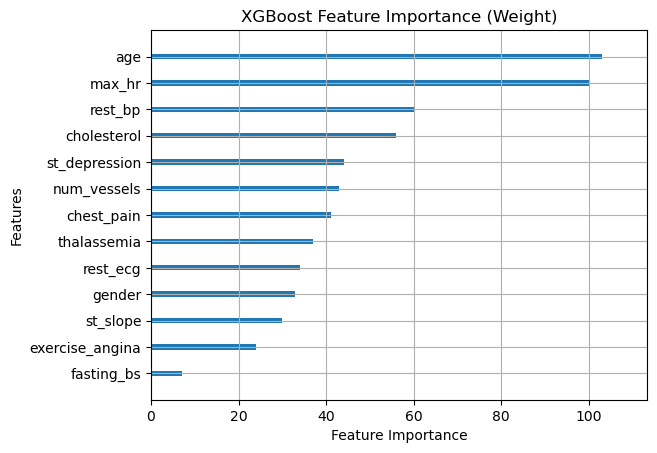

In [55]:
# Get feature importances
feature_importances = xgb_model.get_booster().get_score(importance_type='weight')

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("XGBoost Feature Importances:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', show_values=False, xlabel='Feature Importance', ylabel='Features', title='XGBoost Feature Importance (Weight)')
plt.show()
